<a href="https://colab.research.google.com/github/Shaswattiwari/EDA-project-Hotel-bookings-analysis/blob/main/Hotel_Booking_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA( Exploratory Data Analysis)
##### **Contribution**    - Individual
##### **Name -** - Shaswat Tiwari

# **Project Summary -**


**Data Preparation:**
The project initiated with a meticulous exploration and preparation of the dataset, ensuring its suitability for analysis. This included a detailed examination of data types, detection of missing values, and a thorough study of variable distributions. The objective was to gain an in-depth understanding of the dataset's quality and content.

**Exploratory Data Analysis:**
with a clean and prepared dataset, the analysis proceeded to explore and summarize the data. Descriptive statistics and a range of data visualizations, such as graphs and charts, were employed to unearth patterns, trends, and relationships among various variables.

**Insights and Findings:**
Our exploration of the data yielded valuable insights into the factors influencing hotel booking patterns and pricing. We identified crucial determinants of hotel prices, including minimum stay durations, the number of reviews, and the count of host listings. Additionally, we uncovered disparities in availability across various neighborhoods.


In conclusion, this analysis serves as an invaluable asset for all individuals and entities involved in the hotel booking landscape. It enables data-informed decision-making, enhances the booking journey for travelers, and empowers hotel enterprises to thrive in a highly competitive market. The discoveries underscore the critical significance of data analysis in shaping the evolution of the hospitality industry.


# **GitHub Link -**

https://github.com/Shaswattiwari/EDA-project-Hotel-bookings-analysis

# **Problem Statement**




**1. Hotel Booking Analysis:**

  *   Hotel Booking Proportion by Type
  *   Hotel Bookings by Month (All Months)
  *   Booking Trends Over Time

**2. Customer Analysis:**

  *   Customer Type Distribution
  *   Customer Demographics Analysis

**3. Cancellation Analysis:**

  *   Cancellation Status Analysis
  *   Distribution of Cancellations by Distributor

**4. Pricing Analysis:**

  *   Analysis of Average Daily Rate (ADR) by Reserved Room Type and Hotel
  *   Monthly Room Price Analysis

**5. Stay Analysis:**

  *   Stays in Week Nights & Weekend Nights

**6. Data Exploration and Visualization:**

  *   Correlation Heatmap for Numerical Features
  *   Pair Plot Visualization of Numerical Variables

#### **Define Your Business Objective?**

The business objective for this analysis is to gain a comprehensive understanding of hotel booking patterns and pricing factors within a specific location. This understanding will enable us to provide valuable insights to both travelers and hotel operators. For travelers, the goal is to help them make informed booking decisions. For hotel operators, the aim is to assist in optimizing their operations and pricing strategies. Ultimately, the objective is to bridge the gap between travelers seeking ideal accommodations and hotels striving for excellence in a highly competitive market.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import logging  # Import the logging library for debugging and logging messages
import plotly.express as px  # Import Plotly Express for easy plotting
import missingno as msno  # Import Missingno for visualizing missing data
import pandas as pd  # Import Pandas for data manipulation
import calendar  # Import the calendar module for working with dates
import plotly.graph_objects as go

### Dataset Loading

In [2]:
# Load Dataset
def load_data(path):

        """
        Load data from the given URL/path.
        """

        try:
            pd.set_option('display.max_columns',None)
            data=pd.read_csv(path)      # Load data
            return data

        except FileNotFoundError as e:  # Handle the specific case of a file not found error
          logging.error(f"file not found error {str(e)}")
          raise

        except Exception as e:          # Handle any other unexpected errors during data loading and handling
          logging.error(f"error occured while loding {str(e)}")
          raise

if __name__=="__main__":

  url="https://raw.githubusercontent.com/Shaswattiwari/EDA-project-Hotel-bookings-analysis/main/Hotel%20Bookings.csv"
  dataset=load_data(url)

### Dataset First View

In [3]:
# Dataset First Look
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
num_rows,num_columns=dataset.shape
print(f"number of rows={num_rows}")
print(f"number of columns={num_columns}")

number of rows=119390
number of columns=32


### Dataset Information

In [5]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
num_duplicates=dataset.duplicated().sum()
print(f"Total Numbers of duplicates- {num_duplicates}")

Total Numbers of duplicates- 31994


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values=dataset.isna().sum()
print(f"count of missing/ null values is - {missing_values}")

count of missing/ null values is - hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                 

<Axes: >

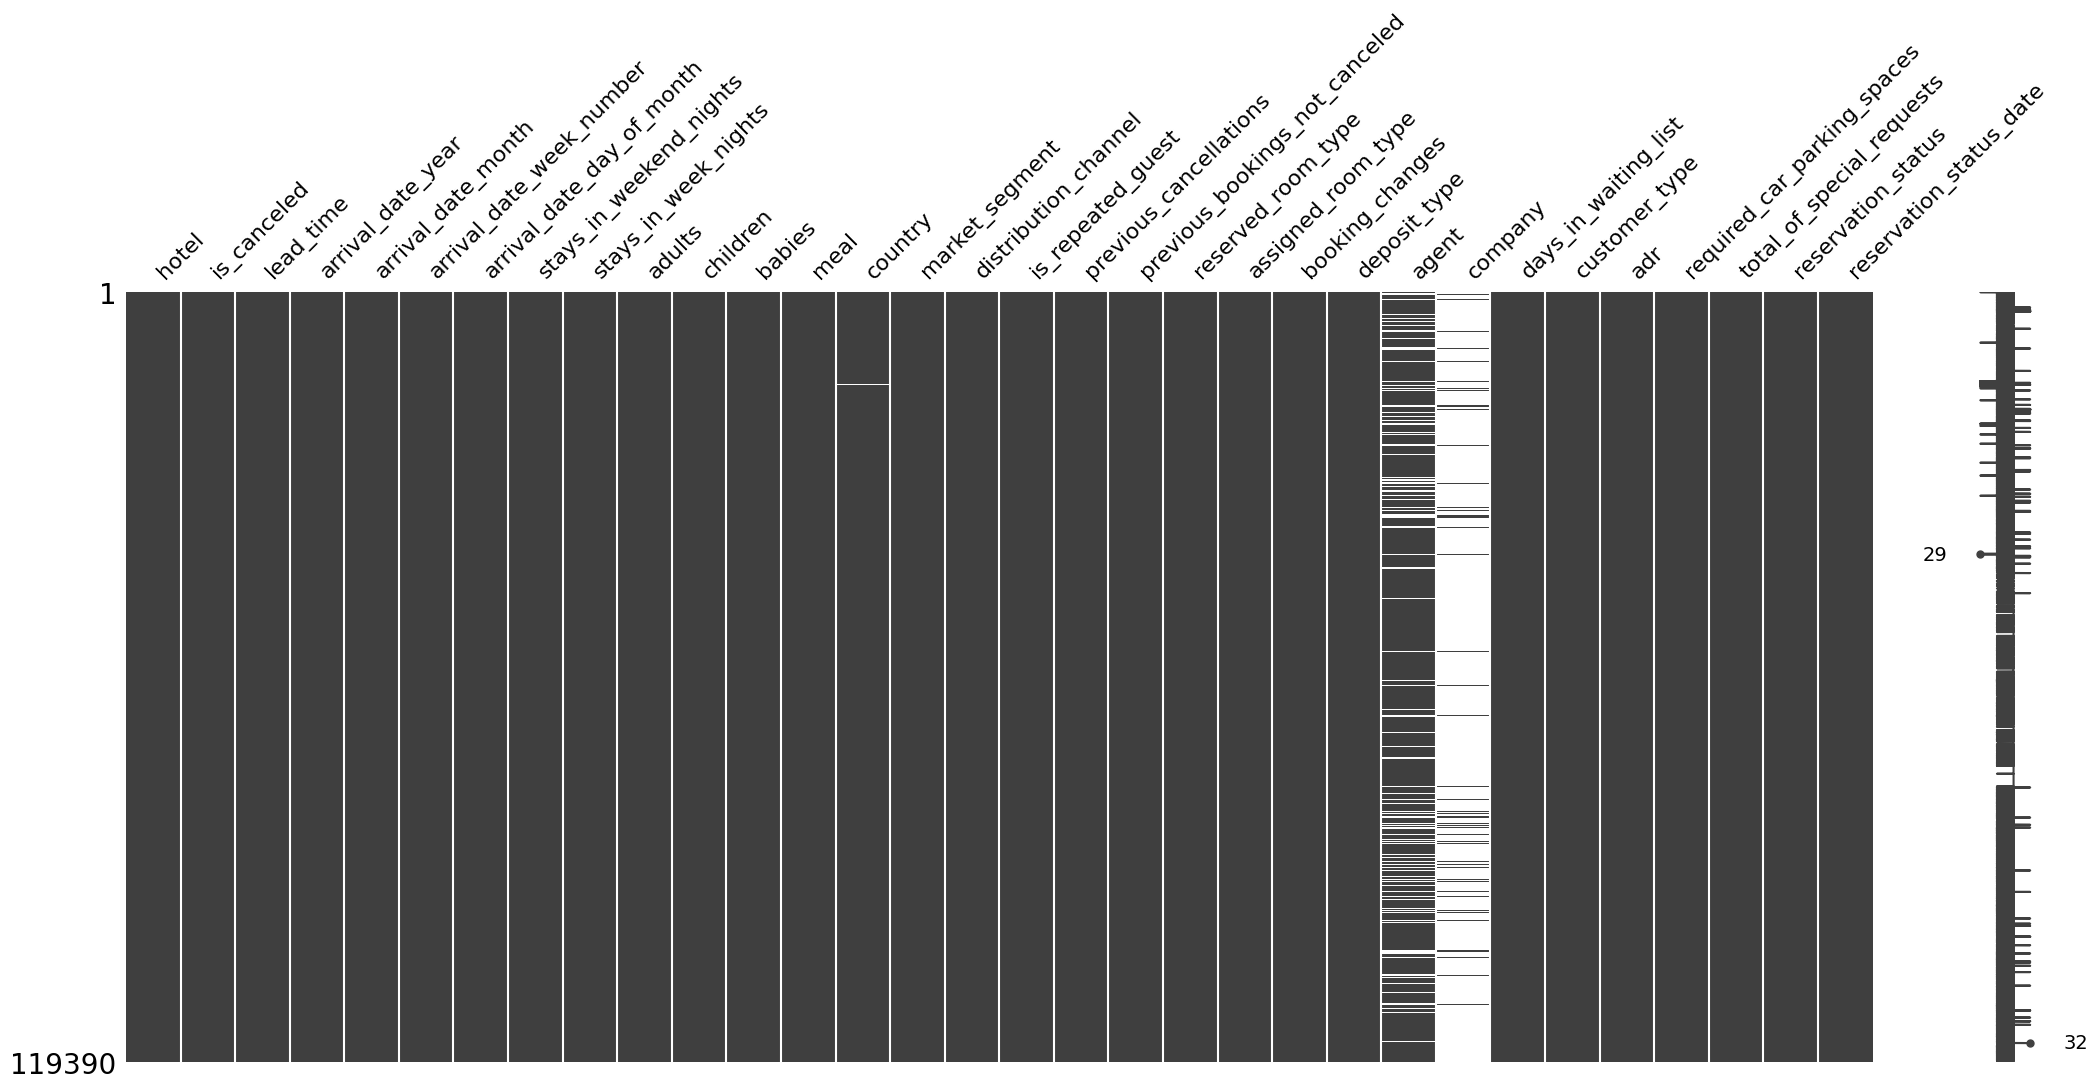

In [8]:
# Visualizing the missing values
msno.matrix(dataset)

### What did you know about your dataset?

This hotel booking dataset contains approximately 119,390 observations from various hotels, encompassing 32 columns of diverse data.

The dataset comprises both categorical and numeric values, offering a comprehensive array of information about hotel reservations and bookings.

It can be a valuable resource for analyzing trends and patterns in the hotel industry, enabling insights into customer preferences and booking behaviors.

This hotel booking dataset provides insights into hotel reservations and bookings spanning the years 2015 to 2017. By exploring this data, we can gain a better understanding of booking trends and guest preferences within the hotel industry during this time period.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# Dataset Describe
dataset.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Variables Description

- **hotel**: This field categorizes the type of hotel

- **is_canceled**: This binary column indicates whether a booking was canceled (1) or not (0)

- **lead_time**: This numeric column represents the number of days between the booking date and the arrival date

- **arrival_date_year**: This column records the year of arrival

- **arrival_date_month**: This field denotes the month of arrival, aiding in seasonality

- **arrival_date_week_number**: This numeric value represents the week number of the year for the arrival date

- **arrival_date_day_of_month**: This column records the day of the month for the arrival date

- **stays_in_weekend_nights**: This numeric field indicates the number of weekend nights (Saturday and Sunday) included in the stay

- **stays_in_week_nights**: This numeric field represents the number of weekdays (Monday to Friday) included in the stay

- **adults**: This column records the number of adult guests in the reservation

- **children**: This field specifies the number of children included in the reservation

- **babies**: This numeric column indicates the number of babies included in the reservation

- **meal**: This categorical column defines the type of meal plan associated with the booking, such as "BB" (Bed & Breakfast), "HB" (Half Board), or others

- **country**: This field records the country of origin for the guests, offering insights into the geographic diversity of hotel guests.

- **market_segment**: This categorical column classifies the market segment to which the booking belongs, such as "Online Travel Agents" or "Corporate," aiding in understanding the source of bookings.

- **distribution_channel**: This column categorizes the distribution channel used to make the booking

- **is_repeated_guest**: This binary field identifies whether the guest is a repeated visitor

- **previous_cancellations**: This numeric column records the number of previous booking cancellations by the guest, aiding in understanding the guest's history.

- **previous_bookings_not_canceled**: This numeric field counts the number of previous bookings that were not canceled by the guest

- **reserved_room_type**: This field specifies the originally reserved room type

- **assigned_room_type**: This column indicates the room type assigned to the guest upon check-in

- **booking_changes**: This numeric value represents the number of changes made to the booking

- **deposit_type**: This categorical field defines the type of deposit made for the reservation

- **agent**: This field records the unique identifier of the travel agency or booking agent involved in the reservation

- **company**: This numeric column contains the unique identifier of the company or entity making the booking

- **days_in_waiting_list**: This numeric value represents the number of days the booking was on the waiting list before it was confirmed

- **customer_type**: This categorical field categorizes the type of customer

- **adr**: This numeric column records the average daily rate (ADR) of the booking

- **required_car_parking_spaces**: This numeric field specifies the number of car parking spaces requested by the guest

- **total_of_special_requests**: This numeric value represents the total number of special requests made by the guest

- **reservation_status**: This categorical field indicates the status of the reservation

- **reservation_status_date**: This field records the date when the reservation status was last updated

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

## 3. ***Data Wrangling***

### Data Wrangling Code

Step 1: Removing duplicate rows if any

In [12]:
# Write your code to make your dataset analysis ready.
df=dataset.copy()

In [13]:
df.shape

(119390, 32)

In [14]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(87396, 32)

Step2: Handling missing values.

In [16]:
df.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [17]:
df[['company','agent']]=df[['company','agent']].fillna(0)

In [18]:
df['children'].fillna(df['children'].mean(),inplace=True)

In [19]:
df['country'].fillna('others',inplace=True)

In [20]:
df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

Step 3: Converting columns to appropriate datatypes.

In [21]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df[['children','company','agent']]=df[['children','company','agent']].astype('int')

In [22]:
# changing datatype of column 'reservation_status_date' to data_type.
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'],format='%Y-%m-%d')

Step 4: Adding important columns.

In [23]:
# Adding total staying days in hotels
df['total_stay']=df['stays_in_weekend_nights']+df['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df['total_people']=df['adults']+df['children']+df['babies']

In [24]:
df["reservation_status_date"].head(5)

0   2015-07-01
1   2015-07-01
2   2015-07-02
3   2015-07-02
4   2015-07-03
Name: reservation_status_date, dtype: datetime64[ns]

### What all manipulations have you done and insights you found?

Copying the Dataset:
The original dataset, referred to as "dataset," is duplicated into a new DataFrame named "df" to ensure that the original data remains unchanged during processing.

Dropping Duplicate Rows:
Duplicate rows within the dataset are identified and removed using the "drop_duplicates" method.

Handling Missing Values:
Missing values in the 'company' and 'agent' columns are imputed with zeros (0) to ensure numerical consistency.

In the 'children' column, missing values are filled using the mean value of the 'children' column.

For the 'country' column, missing values are replaced with the string 'others' to provide a meaningful category for observations
.
Changing Data Types:The data types of the 'children,' 'company,' and 'agent' columns are converted from floating-point numbers to integers. This adjustment simplifies the data structure.
Date Formatting:The 'reservation_status_date' column is transformed into the datetime data type
('%Y-%m-%d).

Feature Engineering:
Two new informative columns are made:
'total_stay': This column computes the total number of days a guest stays at the hotel.
'total_people': This column calculates the total number of individuals staying in each reservation.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [27]:
# Chart - 1 visualization code

hotel_counts=df['hotel'].value_counts().reset_index()
hotel_counts.columns=['Hotel','Count']
# Create the donut chart
fig=px.pie(hotel_counts,values='Count',names='Hotel',title='Hotel Booking Proportion (2015-2017)')
# Add a hole to make it a donut chart
fig.update_traces(hole=0.4, pull=[0.05, 0.05])
# Customize the hover label
fig.update_traces(textinfo='percent+label')
# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

I chose a donut chart for its ability to display proportions effectively,making it easy for viewers to grasp the differences.

##### 2. What is/are the insight(s) found from the chart?

The donut chart highlights the contrast between resort and city hotels, emphasizing that city hotels are more frequently booked, which is a valuable insight for decision-making.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can guide smarter decisions and potentially boost business success. This chart provides a directional view of booking proportions between two types of hotels, helping identify priorities for growth. However, it's essential to note that this chart alone doesn't directly indicate positive or negative impacts on business; additional analysis are needed for a comprehensive assessment.

#### Chart - 2

In [28]:
# Chart - 2 visualization code

monthly_bookings=df['arrival_date_month'].value_counts().reset_index()
monthly_bookings.columns=['Month','Bookings']

# Define the order of months based on popularity
monthly_bookings['month_numeric']=monthly_bookings['Month'].apply(lambda x: list(calendar.month_abbr).index(x[:3]))
monthly_bookings=monthly_bookings.sort_values(by='month_numeric')
# Create a horizontal line for the average number of bookings
average_bookings=monthly_bookings['Bookings'].mean()
# Create the bar chart for all months
fig_all_months=px.bar(monthly_bookings,x='Month',y='Bookings',title='Hotel Bookings by Month (All Months)')
fig_all_months.add_shape(
    type='line',
    x0=-0.5,
    x1=len(monthly_bookings) - 0.5,
    y0=average_bookings,
    y1=average_bookings,
    line=dict(color='red', width=2)
)


# Show the plots
fig_all_months.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart because it's great for showing how hotel bookings vary by month, helping us spot seasonal trends quickly.

##### 2. What is/are the insight(s) found from the chart?

The chart shows monthly hotel bookings, with peak months in summer and lower bookings in winter. The red line marks the average bookings at around 8,000, helping identify high and low seasons

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help businesses plan for high and low seasons, potentially leading to a positive impact by optimizing resources. Negative growth insights could occur if the hotel doesn't adjust staffing or marketing efforts during low seasons, impacting revenue.

#### Chart - 3

In [29]:
# Chart - 3 visualization code


# Combine 'arrival_date_year' and 'arrival_date_month' into a new column 'YearMonth'
df['YearMonth'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str).str.zfill(2)

# Count the bookings for each Year-Month combination
monthly_bookings = df['YearMonth'].value_counts().reset_index()
monthly_bookings.columns = ['YearMonth', 'Bookings']

# Sort the DataFrame by Year-Month to ensure chronological order
monthly_bookings = monthly_bookings.sort_values(by='YearMonth')

# Create a line chart for booking trends over time by Year-Month
fig3 = px.line(monthly_bookings, x='YearMonth', y='Bookings', title='Booking Trends Over Time by Year-Month')

# Customize the x-axis to display Year-Month in a readable format
fig3.update_xaxes(type='category')

# Show the plot
fig3.show()


##### 1. Why did you pick the specific chart?

I chose a line chart for this data because it's effective in showing trends over time,visualizes how the number of bookings changes over months and years, making it easier to identify trends.

##### 2. What is/are the insight(s) found from the chart?

 It shows periods of high and low of booking activity, allowing us to identify seasonality and overall trends in hotel bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can help businesses plan for high and low seasons, potentially leading to a positive impact by optimizing resources. Negative growth insights could occur if the hotel doesn't adjust staffing or marketing efforts during low seasons, impacting revenue.

#### Chart - 4

In [30]:
# Chart - 4 visualization code
customer_type_counts = df['customer_type'].value_counts()
fig = px.bar(customer_type_counts, x=customer_type_counts.index, y=customer_type_counts.values, labels={'x': 'Customer Type', 'y': 'Count'}, title='Customer Type Distribution')
fig.show()


##### 1. Why did you pick the specific chart?

I selected a bar chart for this data because it's well-suited for comparing the distribution of different categories,

##### 2. What is/are the insight(s) found from the chart?

It reveals the count of each customer type, such as Transient, Transient-Party, Contract, and Group. From this chart, we can see that the majority of customers fall under the "Transient" category, indicating that this is the most common type of customer

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can potentially help create a positive business impact. Understanding the distribution of customer types can assist in tailoring marketing strategies and services to better meet the needs of the most common customer type, "Transient," which may lead to increased bookings and revenue.

However, there are no insights in this chart that directly lead to negative growth. Instead, it provides valuable information for businesses to make informed decisions and optimize their operations.

#### Chart - 5

In [31]:
# Chart - 5 visualization code
top_countries = df['country'].value_counts().reset_index().head(10)
top_countries.columns = ['Country', 'Count']

fig_country_origin = px.bar(top_countries, x='Country', y='Count', title='Top 10 Countries of Origin')
fig_country_origin.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart for this data because it's effective in comparing the count of bookings for the top 10 countries of origin. It allows for a quick visual comparison of the number of bookings from each country, making it easy to identify the countries with the highest booking counts.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the top 10 countries of origin for bookings, helping the business target its marketing efforts. It also shows a diverse customer base and suggests growth opportunities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive business impact by focusing marketing efforts on top countries. However, overreliance on a single country for bookings could lead to negative growth if there are economic or political changes impacting that country's travel habits.

#### Chart - 6

In [32]:
# Chart - 6 visualization code
meal_counts = df['meal'].value_counts().reset_index()
meal_counts.columns = ['Meal Preference', 'Count']

# Create a bar chart to visualize meal preferences
fig_meal_preference = px.bar(meal_counts, x='Meal Preference', y='Count', title='Meal Preference Distribution')
fig_meal_preference.show()


##### 1. Why did you pick the specific chart?

I selected a bar chart for this data as it is ideal for showcasing the distribution of categories, allowing for a clear comparison between different meal preferences

##### 2. What is/are the insight(s) found from the chart?

 chart reveals the distribution of meal preferences among customers, with the insights that certain preferences are more popular than others. This information can help catering and food service departments make informed decisions about menu offerings and resource allocation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially create a positive business impact by allowing the hotel to tailor its meal services to better match customer preferences, leading to higher satisfaction and potentially increased revenue.

However, if the hotel misinterprets or ignores these insights, there could be negative consequences. For instance, if the hotel decides to reduce or eliminate unpopular meal options without offering suitable alternatives, it may lead to dissatisfaction among some customers, potentially resulting in negative reviews or decreased customer loyalty.

#### Chart - 7

In [33]:
# Chart - 7 visualization code
booking_behavior = df.groupby('customer_type')[['stays_in_week_nights', 'stays_in_weekend_nights']].mean().reset_index()

# Create a bar chart to compare booking behavior among customer types
fig_booking_behavior = px.bar(booking_behavior, x='customer_type', y=['stays_in_week_nights', 'stays_in_weekend_nights'],
                              title='Customer Type vs. Booking Behavior',
                              labels={'customer_type': 'Customer Type', 'value': 'Average Stays'},
                              barmode='group')
fig_booking_behavior.show()

##### 1. Why did you pick the specific chart?

I chose a grouped bar chart for this data because it allows for a clear visual comparison of booking behavior among different customer types. This chart type makes it easy to compare the average stays in weeknights and weekend nights for each customer type side by side.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights differences in booking behavior among customer types, which can inform targeted marketing strategies for each group.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive business impact by tailoring marketing and services to different customer types. However, there aren't direct negative growth insights from this chart, but failing to address these differences might lead to missed opportunities or customer dissatisfaction.

#### Chart - 8

In [34]:
# Chart - 8 visualization code
cancellation_counts = df['is_canceled'].value_counts()

# Map integer values to custom labels
custom_labels = {0: "canceled", 1: "not canceled"}
cancellation_counts.index = cancellation_counts.index.map(custom_labels)

fig = px.bar(cancellation_counts, x=cancellation_counts.index, y=cancellation_counts.values, labels={'x': 'Cancellation Status', 'y': 'Count'}, title='Cancellation Status')
fig.show()


##### 1. Why did you pick the specific chart?


I chose a bar chart for this data because it's effective in visualizing the distribution of two categories

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into the cancellation status of bookings. It shows the distribution of canceled and not canceled bookings, which is essential for understanding the overall booking cancellation behavior.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart on cancellation status highlights the count of bookings categorized as "canceled" or "not canceled." This data offers insights crucial for pricing, operations, and customer experience improvements. These insights can positively impact revenue, efficiency, and guest satisfaction. Failure to address high cancellations could lead to negative growth, affecting revenue and reputation.

#### Chart - 9

In [35]:
# Chart - 9 visualization code
distributor_counts = df.groupby(['distribution_channel', 'is_canceled']).size().reset_index(name='count')
cancellation_mapping = {0: 'Not Canceled', 1: 'Canceled'}
distributor_counts['cancellation_status'] = distributor_counts['is_canceled'].map(cancellation_mapping)
# Create the second graph (Distribution of Cancellations and Not Cancellations by Distributor)
fig = px.bar(distributor_counts, x='distribution_channel', y='count', color='cancellation_status',
             title='Distribution of Cancellations and Not Cancellations by Distributor',
             labels={'distribution_channel': 'Distributor', 'count': 'Count'})

fig.update_layout(showlegend=True)  # Show the legend for the second graph
fig.show()


##### 1. Why did you pick the specific chart?

I selected a grouped bar chart for this data because it effectively compares the distribution of cancellations and non-cancellations across different distributors.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals how cancellations and non-cancellations are distributed across various distribution channels. It indicates that certain distribution channels have a higher proportion of cancellations compared to others. This insight can be valuable for optimizing distribution strategies and potentially reducing cancellations in channels with higher rates

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can potentially lead to a positive business impact. By identifying distribution channels with higher cancellation rates, businesses can tailor their strategies to reduce cancellations in those channels, leading to increased revenue and customer satisfaction.

However, if corrective actions are not taken to address the high cancellation rates in specific channels, it could result in negative growth.

#### Chart - 10

In [36]:
# Chart - 10 visualization code



yearly_data = df.groupby(['arrival_date_year', 'is_canceled'])['hotel'].count().reset_index()
yearly_data.columns = ['Year', 'IsCanceled', 'Count']

# Filter the data to separate bookings and cancellations
bookings_data = yearly_data[yearly_data['IsCanceled'] == 0]
cancellations_data = yearly_data[yearly_data['IsCanceled'] == 1]

# Create the bar chart
fig = px.bar(bookings_data, x='Year', y='Count', title='Hotel Bookings and Cancellations per Year',
             labels={'Year': 'Year', 'Count': 'Number of Bookings'},
             color_discrete_map={0: 'green', 1: 'red'},
             text='Count', width=800)

# Add cancellations data as a new trace to the bar chart
fig.add_trace(px.bar(cancellations_data, x='Year', y='Count', text='Count').data[0])

# Customize the layout
fig.update_traces(marker=dict(line=dict(width=2)))
fig.update_layout(barmode='group', legend_title_text='Booking Status')
fig.update_xaxes(title_font=dict(size=18))
fig.update_yaxes(title_text='Number of Bookings/Cancellations', title_font=dict(size=18))
fig.show()

##### 1. Why did you pick the specific chart?

I chose a grouped bar chart for this data because it effectively compares two categories across different years.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a clear trend of increasing hotel bookings over the years. In the first year, there were 10,609 bookings, which increased to 31,183 in the second year and remained high at 21,579 in the third year. While cancellations are present, the overall pattern indicates positive growth in bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart can help in creating a positive business impact by providing a clear overview of booking and cancellation trends over the three years. However, there is a potential negative growth aspect indicated by the increasing number of cancellations over the years.

#### Chart - 11

In [37]:
# Chart - 11 visualization code
df = df[df['is_canceled'] == 0]
fig=px.box(data_frame = df, x = 'reserved_room_type', y = 'adr', color = 'hotel')
fig.show()

##### 1. Why did you pick the specific chart?

I chose a box plot for its effectiveness in comparing room price distributions across different room types and hotel categories, helping identify price variations and outliers. It aids in optimizing rates and pricing decisions.

##### 2. What is/are the insight(s) found from the chart?

The box plot displays room price distributions for different room types in city and resort hotels. It highlights variations in prices, with certain room types being cheaper in city hotels and others having broader price ranges in resort hotels. These insights inform pricing and marketing strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can positively impact business by informing pricing and marketing strategies. However, if not acted upon, pricing disparities between city and resort hotels could lead to negative growth in specific market segments, potentially affecting revenue and customer satisfaction.

#### Chart - 12

In [38]:
# Chart - 12 visualization code
resort_data=df[(df["hotel"]=="Resort Hotel")& (df['is_canceled'] == 0)].groupby(['arrival_date_month'])['adr'].mean().reset_index()

data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)].groupby(['arrival_date_month'])['adr'].mean().reset_index()
final_data= resort_data.merge(data_city, on = 'arrival_date_month')
final_data.columns = ['month', 'price_for_resort', 'price_for_city_hotel']


final_data['month_numeric'] = final_data['month'].apply(lambda x: list(calendar.month_abbr).index(x[:3]))

# Sort the DataFrame by month_numeric to ensure chronological order
final_data = final_data.sort_values(by='month_numeric')

px.line(final_data, x = 'month', y = ['price_for_resort','price_for_city_hotel'],
        title = 'Room price per night over the Months')

##### 1. Why did you pick the specific chart?

I chose a line chart for this data because it effectively displays the trends in room prices per night for both resort and city hotels over the months

##### 2. What is/are the insight(s) found from the chart?

The chart highlights differences in room prices between resort and city hotels over the months. Resort prices vary from 48 to 182, while city hotel prices remain more consistent, ranging from 83 to 124. These insights can creating pricing strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help create a positive business impact. By understanding the variation in room prices between resort and city hotels over the months, hotels can optimize pricing strategies to attract more guests during specific periods. However, failing to adjust prices accordingly could lead to negative growth as competitors may capitalize on pricing opportunities.

#### Chart - 13

In [39]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code


# Select relevant numerical columns
numerical_cols = ['total_of_special_requests', 'required_car_parking_spaces', 'adr', 'days_in_waiting_list', 'booking_changes', 'previous_bookings_not_canceled', 'previous_cancellations', 'adults', 'children', 'babies', 'stays_in_week_nights', 'stays_in_weekend_nights', 'lead_time']

# Calculate correlation matrix
corr_matrix = df1[numerical_cols].corr()

# Define a custom 'coolwarm' colorscale
custom_colorscale = [
    [0.0, 'blue'],
    [0.2, 'lightblue'],
    [0.4, 'white'],
    [0.6, 'lightcoral'],
    [0.8, 'red'],
    [1.0, 'darkred']
]
# Create a heatmap using Plotly with the custom colorscale
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=numerical_cols,
    y=numerical_cols,
    colorscale=custom_colorscale,
    zmin=-1,
    zmax=1,
    hoverongaps=False
))

fig.update_layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features')
)

# Show the Plotly heatmap
fig.show()

##### 1. Why did you pick the specific chart?

correlation heatmap for this data because it's an effective way to visually represent the relationships between multiple numerical features

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap visually represents relationships between numerical features. Key insights include a negative correlation between special requests and cancellations, as well as a positive relationship between the number of adults and children in bookings. Overall, it aids in understanding data patterns and relationships for analysis.

#### Chart - 15 - Pair Plot

In [ ]:
print(df.columns)

Index(['hotel', 'is_canceled', 'Lead Time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'ADR',
       'Parking Spaces', 'Special Requests', 'reservation_status',
       'reservation_status_date', 'total_stay', 'total_people', 'YearMonth'],
      dtype='object')


In [ ]:
# Pair Plot visualization code
col = ['Special Requests', 'Parking Spaces', 'ADR', 'Lead Time']

# Create the pair plot
fig = px.scatter_matrix(df, dimensions=col, title="Pair Plot of Numerical Variables")

# Show the plot
fig.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***